In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("Startups.csv")
print(data.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [76]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


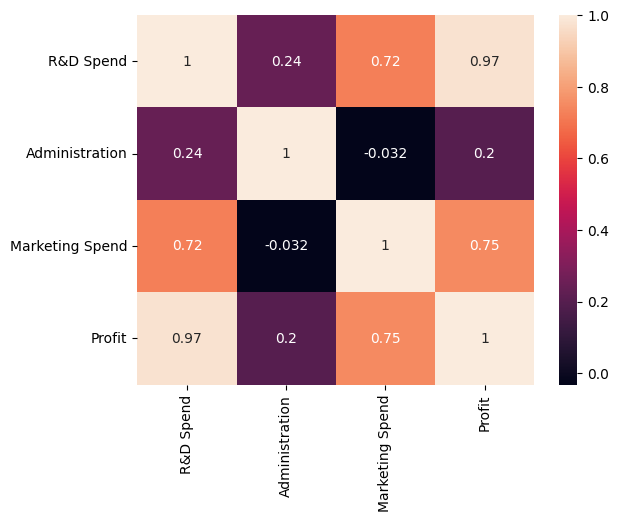

In [77]:
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [78]:
x = data[["R&D Spend", "Administration", "Marketing Spend"]]
y = data["Profit"]

x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# LinearRegression

In [79]:
model = LinearRegression()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
data = pd.DataFrame(data={"Predicted Profit": ypred.flatten()})
print(data.head())

   Predicted Profit
0     126703.027165
1      84894.750816
2      98893.418160
3      46501.708150
4     129128.397344


In [80]:
actual_predicted = pd.DataFrame({"Actual Profit": ytest.flatten(), "Predicted Profit": ypred.flatten()})
print(actual_predicted.head())

   Actual Profit  Predicted Profit
0      134307.35     126703.027165
1       81005.76      84894.750816
2       99937.59      98893.418160
3       64926.08      46501.708150
4      125370.37     129128.397344


In [81]:
# Berechnung des R²-Werts
r2 = r2_score(ytest, ypred)
print("R²-Wert des Modells:", r2)

R²-Wert des Modells: 0.900065308303732


# RandomForestRegressor

In [85]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Trainieren des Modells
rf_model.fit(xtrain, ytrain)

# Vorhersagen machen
y_pred_rf = rf_model.predict(xtest)

# Berechnung des R²-Werts
rf_r2 = r2_score(ytest, y_pred_rf)
print("Random Forest R²-Wert:", rf_r2)


Random Forest R²-Wert: 0.9103164738430438


In [83]:
actual_predicted = pd.DataFrame({"Actual Profit": ytest.flatten(), "Predicted Profit": y_pred_rf.flatten()})
print(actual_predicted.head())

   Actual Profit  Predicted Profit
0      134307.35       133831.6871
1       81005.76        89192.0856
2       99937.59       100239.4889
3       64926.08        44157.3419
4      125370.37       131047.2193


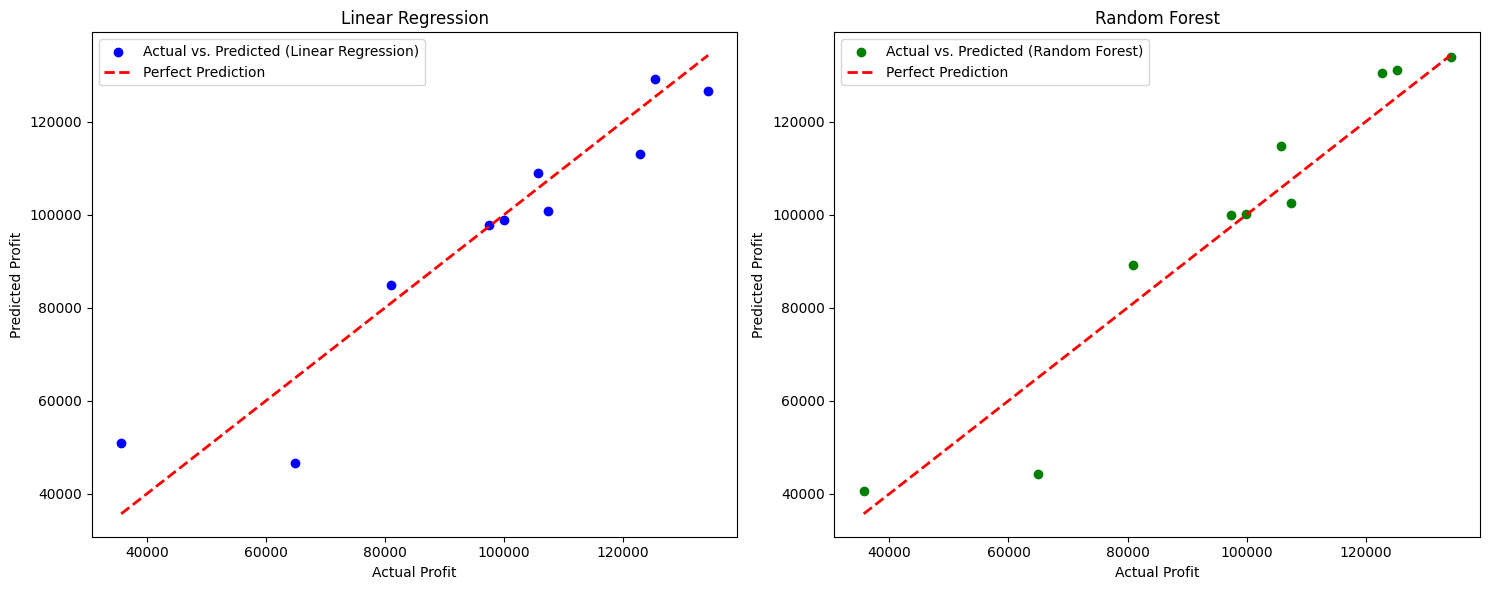

In [84]:
import matplotlib.pyplot as plt

# Scatterplot der tatsächlichen vs. vorhergesagten Werte für lineare Regression
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.scatter(ytest, ypred, color='blue', label='Actual vs. Predicted (Linear Regression)')
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=2, color='red', label='Perfect Prediction')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Linear Regression')
plt.legend()

# Scatterplot der tatsächlichen vs. vorhergesagten Werte für Random Forest
plt.subplot(1, 2, 2)
plt.scatter(ytest, ypred_rf, color='green', label='Actual vs. Predicted (Random Forest)')
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=2, color='red', label='Perfect Prediction')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Random Forest')
plt.legend()

plt.tight_layout()
plt.show()


### Linear Regression:
- R²-Wert des Modells: 0.900065308303732
- Dieses Modell erklärt etwa 90% der Variationen in den Profiten durch die unabhängigen Variablen.
- Es liefert solide Vorhersagen, aber der R²-Wert liegt etwas niedriger als beim Random Forest.

### Random Forest Regression:
- R²-Wert des Modells: 0.9103164738430438
- Dieses Modell erklärt etwa 91% der Variationen in den Profiten durch die unabhängigen Variablen.
- Es liefert ähnliche oder sogar leicht verbesserte Vorhersagen im Vergleich zur linearen Regression.

Zusammenfassend lässt sich sagen, dass der Random Forest etwas besser abschneidet als die lineare Regression, wobei beide Modelle gute Vorhersagen liefern. Es ist wichtig zu beachten, dass der Unterschied zwischen den R²-Werten nicht sehr groß ist, was darauf hinweist, dass beide Modelle ähnlich gut geeignet sind, um die Variationen in den Profiten zu erklären. Du könntest dich also für eines der Modelle entscheiden, basierend auf anderen Faktoren wie Komplexität, Interpretierbarkeit oder Berechnungsgeschwindigkeit.